In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import algos.shallow_nn as shallow_nn
import algos.deep_nn as deep_nn

In [2]:
train_data = pd.read_csv("datasets/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("datasets/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


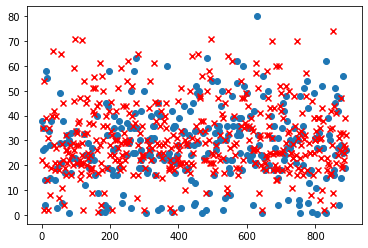

In [4]:
plt.scatter(train_data[train_data.Survived == 1]["PassengerId"], train_data[train_data.Survived == 1]["Age"], marker="o")

plt.scatter(train_data[train_data.Survived == 0]["PassengerId"], train_data[train_data.Survived == 0]["Age"], marker="x", color="red")

In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [7]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "Parch", "SibSp"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

y = np.array([y]).T
X = np.array(X)

X_train = X[:(int(len(X)*0.75)), :].T
X_val = X[(int(len(X)*0.75)):, :].T
y_train = y[:(int(len(X)*0.75)), :].T
y_val = y[(int(len(X)*0.75)):, :].T
X_test = np.array(X_test).T

In [8]:
X_train.shape

(5, 668)

In [9]:
layer_dims = [5, 10, 10, 8, 1]

# tanh activation needs some more work

nn_model = deep_nn.model(X_train, y_train, X_val, y_val, layers_dims=layer_dims, activation = "relu",learning_rate = 0.1, print_cost = True, num_iterations=10000)

Cost after iteration 0: 0.6931213073635432
Cost after iteration 1000: 0.11375283012455929
Cost after iteration 2000: 0.11373743787538135
Cost after iteration 3000: 0.11372258319350274
Cost after iteration 4000: 0.1137077201144779
Cost after iteration 5000: 0.11369274821277094
Cost after iteration 6000: 0.1136775661141606
Cost after iteration 7000: 0.11366206436483434
Cost after iteration 8000: 0.1136460461123204
Cost after iteration 9000: 0.11362941284431985
Cost after iteration 9999: 0.11361202148059187
train accuracy: 97.58615037476092 %
test accuracy: 95.93928917572313 %


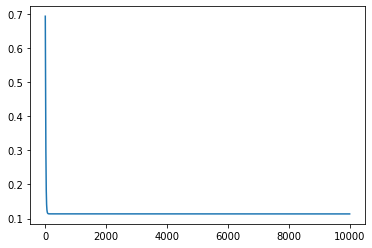

In [10]:
plt.plot([x for x in range(10000)], nn_model["costs"])

In [11]:
snn_model = shallow_nn.model(X_train, y_train, X_val, y_val, n_h = 10, num_iterations=10000, learning_rate=0.2, print_cost = True)

Cost after iteration 0: 0.693146
Cost after iteration 1000: 0.113733
Cost after iteration 2000: 0.113732
Cost after iteration 3000: 0.113731
Cost after iteration 4000: 0.113730
Cost after iteration 5000: 0.113729
Cost after iteration 6000: 0.113728
Cost after iteration 7000: 0.113727
Cost after iteration 8000: 0.113726
Cost after iteration 9000: 0.113725
Cost after iteration 9999: 0.113723
train accuracy: 97.58615037476092 %
test accuracy: 95.93928917572313 %


Text(0.5, 1.0, 'Shallow vs Deep')

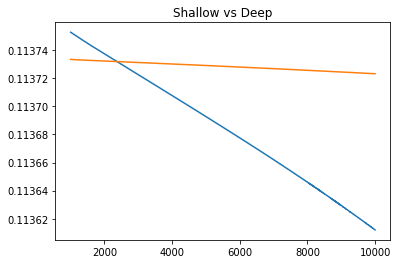

In [12]:
plt.plot([x for x in range(1000,10000)], nn_model["costs"][1000:])
plt.plot([x for x in range(1000,10000)], snn_model["costs"][1000:])
plt.title("Shallow vs Deep")

In [13]:
predictions = np.squeeze(deep_nn.predict(nn_model["parameters"], X_test))


# output = pd.DataFrame({'Sex': np.squeeze(X_val.T[:, 3]), 'Predictions': predictions, 'Actual': np.squeeze(y_val)})
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('titanic.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
